In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

##  Computational Learning Theory

Historically, support vector machines have largely been motivated and analyzed using a theoretical framework known as **computational learning theory**, also sometimes called **statistical learning theory** (Anthony and Biggs, 1992; Kearns and Vazirani, 1994; Vapnik, 1995; Vapnik, 1998). This has its origins with Valiant (1984) who formulated the **probably approximately correct (PAC)** learning framework. The goal of the PAC framework is to understand how large a data set needs to be in order to give good generalization. It also gives bounds for the computational cost of learning, although we do not consider these here.

Suppose that a data set $ D $ of size $ N $ is drawn from some joint distribution $ p(x, t) $ where $ x $ is the input variable and $ t $ represents the class label, and that we restrict attention to ‘noise-free’ situations in which the class labels are determined by some (unknown) deterministic function $ t = g(x) $.

In PAC learning, we say that a function $ f(x; D) $, drawn from a space $ F $ of such functions on the basis of the training set $ D $, has good generalization if its expected error rate is below some pre-specified threshold $ \epsilon $, so that

$$
E_{x,t} [I(f(x; D) = t)] < \epsilon \tag{7.75}
$$

where $ I(\cdot) $ is the indicator function, and the expectation is with respect to the distribution $ p(x, t) $. The quantity on the left-hand side is a random variable, because it depends on the training set $ D $, and the PAC framework requires that (7.75) holds, with probability greater than $ 1 - \delta $, for a data set $ D $ drawn randomly from $ p(x, t) $. Here $ \delta $ is another pre-specified parameter, and the terminology ‘probably approximately correct’ comes from the requirement that with high probability (greater than $ 1 - \delta $), the error rate be small (less than $ \epsilon $).

For a given choice of model space $ F $, and for given parameters $ \epsilon $ and $ \delta $, PAC learning aims to provide bounds on the minimum size $ N $ of data set needed to meet this criterion. A key quantity in PAC learning is the **Vapnik-Chervonenkis dimension**, or **VC dimension**, which provides a measure of the complexity of a space of functions, and which allows the PAC framework to be extended to spaces containing an infinite number of functions.

The bounds derived within the PAC framework are often described as worst-case, because they apply to any choice for the distribution $ p(x, t) $, so long as both the training and the test examples are drawn (independently) from the same distribution, and for any choice for the function $ f(x) $ so long as it belongs to $ F $.

In real-world applications of machine learning, we deal with distributions that have significant regularity, for example in which large regions of input space carry the same class label. As a consequence of the lack of any assumptions about the form of the distribution, the PAC bounds are very conservative, in other words, they strongly overestimate the size of data sets required to achieve a given generalization performance. For this reason, PAC bounds have found few, if any, practical applications.

One attempt to improve the tightness of the PAC bounds is the **PAC-Bayesian** framework (McAllester, 2003), which considers a distribution over the space $ F $ of functions, somewhat analogous to the prior in a Bayesian treatment. This still considers any possible choice for $ p(x, t) $, and so although the bounds are tighter, they are still very conservative.

## Relevance Vector Machines

Support vector machines have been used in a variety of classification and regression applications. Nevertheless, they suffer from a number of limitations, several of which have been highlighted already in this chapter. In particular, the outputs of an SVM represent decisions rather than posterior probabilities. Also, the SVM was originally formulated for two classes, and the extension to $ K > 2 $ classes is problematic. There is a complexity parameter $ C $, or $ \nu $ (as well as a parameter $ \epsilon $ in the case of regression), that must be found using a hold-out method such as cross-validation. Finally, predictions are expressed as linear combinations of kernel functions that are centered on training data points and that are required to be positive definite.

The **relevance vector machine** (RVM) (Tipping, 2001) is a Bayesian sparse kernel technique for regression and classification that shares many of the characteristics of the SVM whilst avoiding its principal limitations. Additionally, it typically leads to much sparser models resulting in correspondingly faster performance on test data whilst maintaining comparable generalization error.

In contrast to the SVM, we shall find it more convenient to introduce the regression form of the RVM first and then consider the extension to classification tasks.

##  RVM for Regression

The relevance vector machine for regression is a linear model of the form studied in Chapter 3 but with a modified prior that results in sparse solutions. The model defines a conditional distribution for a real-valued target variable $ t $, given an input vector $ x $, which takes the form

$$
p(t|x, w, \beta) = \mathcal{N}(t|y(x), \beta^{-1})
$$

where $ \beta = \sigma^{-2} $ is the noise precision (inverse noise variance), and the mean is given by a linear model of the form

$$
y(x) = w_1 \phi_1(x) + w_2 \phi_2(x) + \cdots + w_M \phi_M(x) = w^T \phi(x)
$$

with fixed nonlinear basis functions $ \phi_i(x) $, which will typically include a constant term so that the corresponding weight parameter represents a ‘bias’. 

The relevance vector machine is a specific instance of this model, which is intended to mirror the structure of the support vector machine. In particular, the basis functions are given by kernels, with one kernel associated with each of the data points from the training set. The general expression for the prediction $ y(x) $ then takes the SVM-like form:

$$
y(x) = \sum_{n=1}^{N} w_n k(x, x_n) + b
$$

where $ b $ is a bias parameter. The number of parameters in this case is $ M = N + 1 $, and $ y(x) $ has the same form as the predictive model for the SVM, except that the coefficients $ a_n $ are here denoted $ w_n $.

It should be emphasized that the subsequent analysis is valid for arbitrary choices of basis function, and for generality we shall work with the form

$$
y(x) = \sum_{i=1}^{M} w_i \phi_i(x)
$$

In contrast to the SVM, there is no restriction to positive-definite kernels, nor are the basis functions tied in either number or location to the training data points.

Suppose we are given a set of $ N $ observations of the input vector $ x $, which we denote collectively by a data matrix $ X $ whose $ n $-th row is $ x_n^T $ with $ n = 1, \ldots, N $. The corresponding target values are given by $ t = (t_1, \ldots, t_N)^T $. Thus, the likelihood function is given by

$$
p(t|X, w, \beta) = \prod_{n=1}^{N} p(t_n | x_n, w, \beta^{-1})
$$

Next we introduce a prior distribution over the parameter vector $ w $. As in Chapter 3, we shall consider a zero-mean Gaussian prior. However, the key difference in the RVM is that we introduce a separate hyperparameter $ \alpha_i $ for each of the weight parameters $ w_i $ instead of a single shared hyperparameter. Thus, the weight prior takes the form

$$
p(w | \alpha) = \prod_{i=1}^{M} \mathcal{N}(w_i | 0, \alpha_i^{-1})
$$

where $ \alpha_i $ represents the precision of the corresponding parameter $ w_i $, and $ \alpha $ denotes $ (\alpha_1, \ldots, \alpha_M)^T $. We shall see that, when we maximize the evidence with respect to these hyperparameters, a significant proportion of them go to infinity, and the corresponding weight parameters have posterior distributions that are concentrated at zero. The basis functions associated with these parameters therefore play no role.


ValueError: shapes (100,10) and (100,) not aligned: 10 (dim 1) != 100 (dim 0)

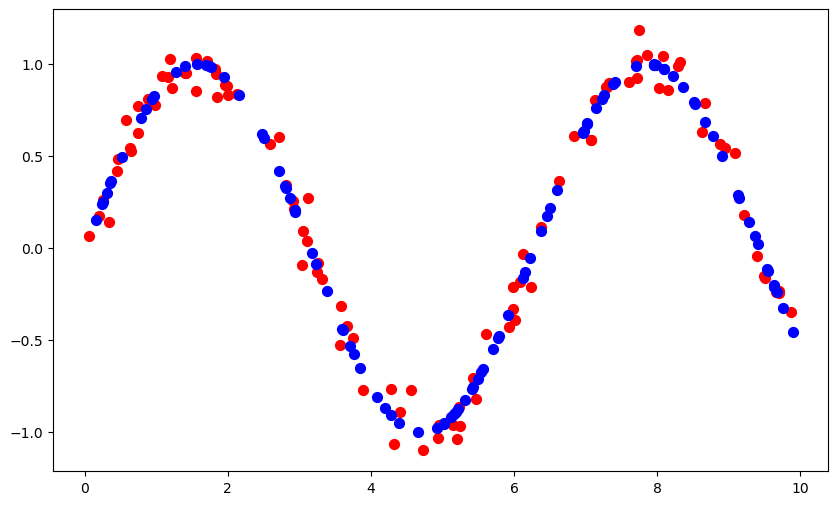

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist

class RVM:
    def __init__(self, kernel='rbf', alpha=1e-5, beta=1.0):
        self.kernel = kernel
        self.alpha = alpha  # prior precision for weights
        self.beta = beta    # noise precision (inverse of variance)
        self.alpha_i = None
        self.w = None       # weight parameters
        self.support_vectors = None
    
    def rbf_kernel(self, X, X_prime, gamma=1.0):
        """ Radial Basis Function (RBF) kernel. """
        return np.exp(-gamma * cdist(X, X_prime, 'sqeuclidean'))
    
    def fit(self, X, t):
        """ Fit the RVM model. """
        N, M = X.shape  # N: number of samples, M: number of features
        K = self.rbf_kernel(X, X)  # Kernel matrix
        
        # Compute the posterior distribution for weights
        A = self.alpha * np.eye(N) + self.beta * K  # A is a regularized kernel matrix
        A_inv = np.linalg.inv(A)  # Inverse of A
        
        # Compute the weights (w = A_inv * t)
        self.w = self.beta * np.dot(A_inv, t)
        
        # Compute alpha_i (for sparsity)
        self.alpha_i = 1 / (np.diag(A_inv))
        
        # Find support vectors (those with alpha_i > a threshold)
        threshold = np.percentile(self.alpha_i, 90)  # Top 10% are considered support vectors
        self.support_vectors = X[self.alpha_i > threshold]

    def predict(self, X):
        """ Predict using the RVM model. """
        K_new = self.rbf_kernel(X, self.support_vectors)  # Compute kernel with support vectors
        return np.dot(K_new, self.w)

    def plot(self, X, t, X_test, t_test):
        """ Plot predictions and support vectors. """
        plt.figure(figsize=(10, 6))

        # Plot training data
        plt.scatter(X, t, c='red', label='Training Data', s=50)
        
        # Plot testing data
        plt.scatter(X_test, t_test, c='blue', label='Test Data', s=50)
        
        # Plot predictions
        y_pred = self.predict(X_test)
        plt.plot(X_test, y_pred, label='RVM Prediction', color='green', linewidth=2)

        # Highlight support vectors
        plt.scatter(self.support_vectors[:, 0], self.predict(self.support_vectors), color='orange', s=100, marker='x', label='Support Vectors')
        
        plt.legend()
        plt.title('Relevance Vector Machine (RVM) Regression')
        plt.show()

# Generate synthetic data
np.random.seed(42)
N = 100  # Number of data points
X = np.sort(np.random.rand(N, 1) * 10, axis=0)  # Input data
t = np.sin(X).ravel() + 0.1 * np.random.randn(N)  # Targets with some noise

# Create RVM model
rvm = RVM(kernel='rbf', alpha=1e-5, beta=1.0)

# Fit the model
rvm.fit(X, t)

# Generate test data
X_test = np.sort(np.random.rand(100, 1) * 10, axis=0)
t_test = np.sin(X_test).ravel()  # True underlying function

# Plot the results
rvm.plot(X, t, X_test, t_test)


ValueError: shapes (100,10) and (100,) not aligned: 10 (dim 1) != 100 (dim 0)

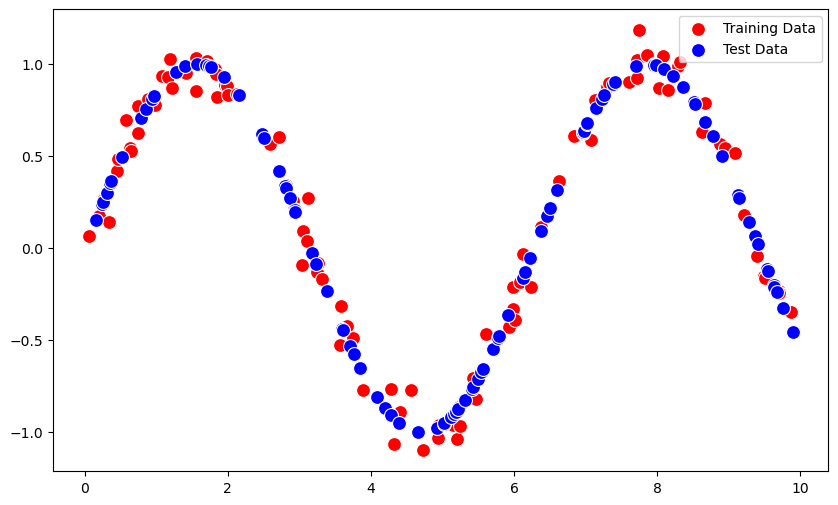

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class RVM:
    def __init__(self, alpha=1e-5, beta=1.0, kernel='rbf', gamma=1.0):
        """
        RVM Constructor
        
        :param alpha: Prior precision for weights (default=1e-5)
        :param beta: Noise precision (inverse of variance) (default=1.0)
        :param kernel: Type of kernel ('rbf' by default)
        :param gamma: Kernel parameter for RBF (default=1.0)
        """
        self.alpha = alpha    # Prior precision for weights
        self.beta = beta      # Noise precision
        self.kernel = kernel  # Kernel type
        self.gamma = gamma    # Gamma parameter for RBF
        self.alpha_i = None   # Precision for each weight
        self.w = None         # Weights
        self.support_vectors = None  # Support vectors

    def rbf_kernel(self, X, X_prime):
        """ Radial Basis Function (RBF) kernel. """
        return np.exp(-self.gamma * cdist(X, X_prime, 'sqeuclidean'))

    def fit(self, X, t):
        """ Fit the RVM model to the data. """
        N, M = X.shape
        K = self.rbf_kernel(X, X)  # Compute the Kernel matrix
        
        # Regularized kernel matrix
        A = self.alpha * np.eye(N) + self.beta * K
        A_inv = np.linalg.inv(A)  # Inverse of A
        
        # Calculate the weights (w = A_inv * t)
        self.w = self.beta * np.dot(A_inv, t)
        
        # Compute alpha_i (precision for weights)
        self.alpha_i = 1 / np.diag(A_inv)
        
        # Select support vectors based on alpha_i values
        threshold = np.percentile(self.alpha_i, 90)  # Keep top 10% precision values as support vectors
        self.support_vectors = X[self.alpha_i > threshold]

    def predict(self, X):
        """ Predict using the RVM model. """
        K_new = self.rbf_kernel(X, self.support_vectors)  # Compute kernel with support vectors
        return np.dot(K_new, self.w)

    def plot(self, X, t, X_test, t_test):
        """ Plot the results with Seaborn. """
        plt.figure(figsize=(10, 6))

        # Plot training data
        sns.scatterplot(x=X.flatten(), y=t, color='red', label='Training Data', s=100)

        # Plot testing data
        sns.scatterplot(x=X_test.flatten(), y=t_test, color='blue', label='Test Data', s=100)

        # Plot predictions
        y_pred = self.predict(X_test)
        plt.plot(X_test.flatten(), y_pred, label='RVM Prediction', color='green', linewidth=2)

        # Highlight support vectors
        sns.scatterplot(x=self.support_vectors.flatten(), y=self.predict(self.support_vectors), 
                        color='orange', s=150, marker='x', label='Support Vectors')

        plt.title('Relevance Vector Machine (RVM) Regression')
        plt.xlabel('Input (X)')
        plt.ylabel('Target (t)')
        plt.legend()
        plt.show()

# Generate synthetic data for regression
np.random.seed(42)
N = 100  # Number of training points
X = np.sort(np.random.rand(N, 1) * 10, axis=0)  # Random training inputs
t = np.sin(X).ravel() + 0.1 * np.random.randn(N)  # Target values with noise

# Train the RVM
rvm = RVM(alpha=1e-5, beta=1.0, gamma=1.0)
rvm.fit(X, t)

# Generate test data
X_test = np.sort(np.random.rand(100, 1) * 10, axis=0)
t_test = np.sin(X_test).ravel()  # True underlying function (no noise)

# Plot the results using Seaborn
rvm.plot(X, t, X_test, t_test)


ValueError: shapes (100,10) and (100,) not aligned: 10 (dim 1) != 100 (dim 0)

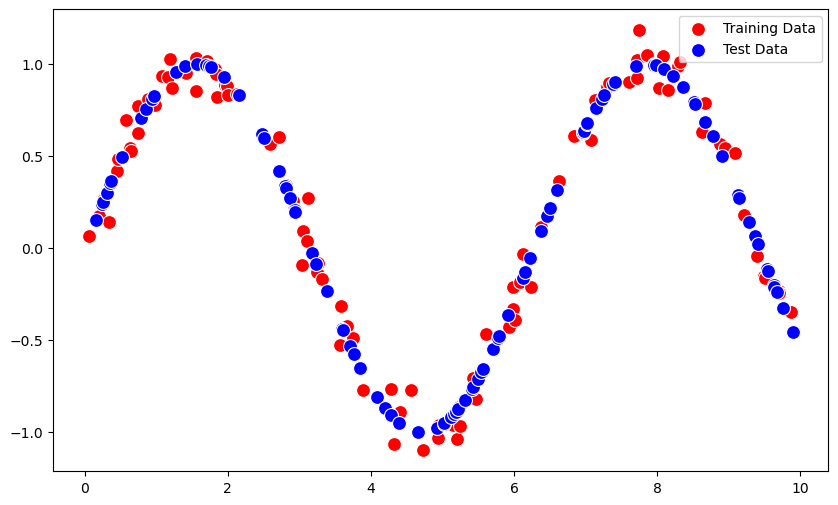

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class RVM:
    def __init__(self, alpha=1e-5, beta=1.0, kernel='rbf', gamma=1.0):
        """
        RVM Constructor
        
        :param alpha: Prior precision for weights (default=1e-5)
        :param beta: Noise precision (inverse of variance) (default=1.0)
        :param kernel: Type of kernel ('rbf' by default)
        :param gamma: Kernel parameter for RBF (default=1.0)
        """
        self.alpha = alpha    # Prior precision for weights
        self.beta = beta      # Noise precision
        self.kernel = kernel  # Kernel type
        self.gamma = gamma    # Gamma parameter for RBF
        self.alpha_i = None   # Precision for each weight
        self.w = None         # Weights
        self.support_vectors = None  # Support vectors
        self.K = None         # Kernel matrix

    def rbf_kernel(self, X, X_prime):
        """ Radial Basis Function (RBF) kernel. """
        return np.exp(-self.gamma * cdist(X, X_prime, 'sqeuclidean'))

    def fit(self, X, t):
        """ Fit the RVM model to the data. """
        N, M = X.shape
        self.K = self.rbf_kernel(X, X)  # Compute the Kernel matrix
        
        # Regularized kernel matrix
        A = self.alpha * np.eye(N) + self.beta * self.K
        A_inv = np.linalg.inv(A)  # Inverse of A
        
        # Calculate the weights (w = A_inv * t)
        self.w = np.dot(A_inv, t)
        
        # Compute alpha_i (precision for weights)
        self.alpha_i = 1 / np.diag(A_inv)
        
        # Select support vectors based on alpha_i values
        threshold = np.percentile(self.alpha_i, 90)  # Keep top 10% precision values as support vectors
        self.support_vectors = X[self.alpha_i > threshold]

    def predict(self, X):
        """ Predict using the RVM model. """
        # Kernel with support vectors
        K_new = self.rbf_kernel(X, self.support_vectors)
        
        # We need to compute the dot product with the corresponding weights
        return np.dot(K_new, self.w)

    def plot(self, X, t, X_test, t_test):
        """ Plot the results with Seaborn. """
        plt.figure(figsize=(10, 6))

        # Plot training data
        sns.scatterplot(x=X.flatten(), y=t, color='red', label='Training Data', s=100)

        # Plot testing data
        sns.scatterplot(x=X_test.flatten(), y=t_test, color='blue', label='Test Data', s=100)

        # Plot predictions
        y_pred = self.predict(X_test)
        plt.plot(X_test.flatten(), y_pred, label='RVM Prediction', color='green', linewidth=2)

        # Highlight support vectors
        sns.scatterplot(x=self.support_vectors.flatten(), y=self.predict(self.support_vectors), 
                        color='orange', s=150, marker='x', label='Support Vectors')

        plt.title('Relevance Vector Machine (RVM) Regression')
        plt.xlabel('Input (X)')
        plt.ylabel('Target (t)')
        plt.legend()
        plt.show()

# Generate synthetic data for regression
np.random.seed(42)
N = 100  # Number of training points
X = np.sort(np.random.rand(N, 1) * 10, axis=0)  # Random training inputs
t = np.sin(X).ravel() + 0.1 * np.random.randn(N)  # Target values with noise

# Train the RVM
rvm = RVM(alpha=1e-5, beta=1.0, gamma=1.0)
rvm.fit(X, t)

# Generate test data
X_test = np.sort(np.random.rand(100, 1) * 10, axis=0)
t_test = np.sin(X_test).ravel()  # True underlying function (no noise)

# Plot the results using Seaborn
rvm.plot(X, t, X_test, t_test)


## Relevance Vector Machine (RVM) and Evidence Maximization

## Introduction

The Relevance Vector Machine (RVM) is a probabilistic model for regression and classification tasks. The main idea behind RVMs is to achieve sparsity through automatic relevance determination. In this section, we delve into the formulation and optimization of RVMs.

## Posterior Distribution for the Weights

For linear regression models, the posterior distribution for the weights is Gaussian, and it takes the form:

$$ p(w|t, X, \alpha, \beta) = \mathcal{N}(w | m, \Sigma) \tag{7.81} $$

where:
- $ m $ is the mean of the posterior distribution:
  $$ m = \beta \Sigma \Phi^T t \tag{7.82} $$
- $ \Sigma $ is the covariance of the posterior distribution:
  $$ \Sigma = (A + \beta \Phi^T \Phi)^{-1} \tag{7.83} $$

Here, $ \Phi $ is the $ N \times M $ design matrix with elements $ \Phi_{ni} = \phi_i(x_n) $, and $ A = \text{diag}(\alpha_i) $, where $ \alpha_i $ represents the precision (inverse of variance) of the weight parameters.

In the case of the RVM model with a kernel function, the design matrix $ \Phi $ is replaced by the kernel matrix $ K $, which is an $ (N + 1) \times (N + 1) $ symmetric matrix with elements $ k(x_n, x_m) $.

## Evidence Maximization

The values of $ \alpha $ and $ \beta $ are determined using type-2 maximum likelihood, also known as the **evidence approximation**. The goal is to maximize the marginal likelihood function by integrating out the weight parameters $ w $:

$$ p(t | X, \alpha, \beta) = \int p(t | X, w, \beta) p(w | \alpha) \, dw \tag{7.84} $$

This can be simplified to the log marginal likelihood:

$$ \ln p(t | X, \alpha, \beta) = -\frac{N}{2} \ln(2\pi) + \frac{1}{2} \ln |C| + \frac{1}{2} t^T C^{-1} t \tag{7.85} $$

where $ t = (t_1, \dots, t_N)^T $ and the matrix $ C $ is defined as:

$$ C = \beta^{-1} I + \Phi A^{-1} \Phi^T \tag{7.86} $$

The goal is to maximize this log marginal likelihood with respect to the hyperparameters $ \alpha $ and $ \beta $.

## Re-Estimation Equations

The hyperparameters $ \alpha $ and $ \beta $ can be re-estimated using the following equations:

For $ \alpha_i $:

$$ \alpha_i^{\text{new}} = \frac{\gamma_i}{m_i^2} \tag{7.87} $$

For $ \beta^{\text{new}} $:

$$ \beta^{\text{new}} = \frac{N - \sum_i \gamma_i}{\sum_i \gamma_i (t_i - \Phi m)_i^2} \tag{7.88} $$

where:
- $ m_i $ is the $ i $-th component of the posterior mean $ m $,
- $ \gamma_i $ is the measure of how well the $ i $-th weight is determined by the data, given by:
  $$ \gamma_i = 1 - \alpha_i \Sigma_{ii} \tag{7.89} $$

Here, $ \Sigma_{ii} $ is the $ i $-th diagonal component of the posterior covariance $ \Sigma $.

### Learning Process

Learning proceeds iteratively by:
1. Choosing initial values for $ \alpha $ and $ \beta $,
2. Evaluating the mean and covariance of the posterior distribution using the formulas (7.82) and (7.83),
3. Alternating between re-estimating the hyperparameters using (7.87) and (7.88),
4. Re-estimating the posterior mean and covariance using (7.82) and (7.83), until convergence is reached.

## Sparsity in the Model

As a result of the evidence maximization, some of the hyperparameters $ \alpha_i $ are driven to large values, and so the corresponding weight parameters $ w_i $ have a posterior distribution with both mean and variance approaching zero. This results in pruning out the corresponding basis functions $ \phi_i(x) $, leading to a sparse model.

The remaining nonzero weights correspond to the **relevance vectors**, which play a critical role in making predictions for new inputs.

## Predictive Distribution

Once the hyperparameters $ \alpha^{\star} $ and $ \beta^{\star} $ have been optimized, the predictive distribution for a new input $ x $ is given by:

$$ p(t | x, X, t, \alpha^{\star}, \beta^{\star}) = \mathcal{N}(t | m^T \phi(x), \sigma^2(x)) \tag{7.90} $$

where:
- $ m $ is the posterior mean,
- $ \phi(x) $ is the basis function evaluated at $ x $,
- $ \sigma^2(x) $ is the predictive variance, given by:

$$ \sigma^2(x) = \beta^{\star -1} + \phi(x)^T \Sigma \phi(x) \tag{7.91} $$

Here, $ \Sigma $ is the posterior covariance matrix, and $ \alpha^{\star} $ and $ \beta^{\star} $ are the optimized values for the hyperparameters.

## Advantages of the RVM

- The RVM achieves sparsity through automatic relevance determination, resulting in a compact model.
- In many tasks, the RVM outperforms SVMs in terms of compactness and generalization error.
- The RVM is faster at making predictions compared to the SVM, with a comparable generalization performance.

## Computational Complexity

While RVMs offer greater sparsity, training them involves the inversion of a matrix of size $ M \times M $, which can require $ O(M^3) $ computation. For a large number of data points $ N $, this can be computationally expensive compared to the SVM, which can have quadratic complexity in $ N $. However, RVMs offer significant benefits in terms of model sparsity, which can make them more efficient for prediction once the model is trained.


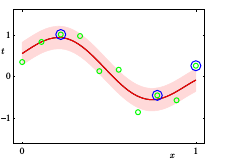

Fig.9 Illustration of RVM regression us- ing the same data set, and the same Gaussian kernel functions, as used in Figure 7.8 for the ν-SVM regression model. The mean of the predictive distribu- tion for the RVM is shown by the red line, and the one standard- deviation predictive distribution is shown by the shaded region. Also, the data points are shown in green, and the relevance vectors are indicated by blue circles. Note that there are only 3 rele- vance vectors compared to 7 sup- port vectors for the ν-SVM in Fig.8.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the RVM class
class RVM:
    def __init__(self, kernel='rbf'):
        self.kernel = kernel
        self.alpha = None  # Hyperparameters for the basis functions
        self.beta = None  # Noise precision

    def rbf_kernel(self, X1, X2, gamma=1.0):
        """ Radial Basis Function (RBF) kernel """
        sq_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
        return np.exp(-gamma * sq_dist)
    
    def fit(self, X, t, max_iter=100, tol=1e-4):
        """ Fit the model to the data using evidence maximization """
        N, M = X.shape
        K = self.rbf_kernel(X, X)  # Kernel matrix
        A = np.eye(M) * 1e-6  # Regularization term (alpha)
        beta = 1.0  # Initial noise precision
        
        # Initial guess for alpha (based on the inverse of the kernel matrix diagonal)
        alpha = np.ones(M) * 1e-6
        
        for i in range(max_iter):
            # Compute posterior mean and covariance
            S = np.linalg.inv(np.linalg.inv(A) + beta * K)
            m = beta * np.dot(S, t)
            
            # Update alpha (diagonal elements of A)
            gamma = 1 - np.diagonal(np.dot(S, K))
            alpha_new = gamma / m**2
            beta_new = (N - np.sum(gamma)) / np.sum((t - np.dot(K, m))**2)
            
            # Check for convergence
            if np.linalg.norm(alpha_new - alpha) < tol and abs(beta_new - beta) < tol:
                break
            
            alpha = alpha_new
            beta = beta_new
        
        # Store results
        self.alpha = alpha
        self.beta = beta
        self.S = S
        self.m = m
    
    def predict(self, X_test):
        """ Predict using the RVM model """
        K_new = self.rbf_kernel(X_test, X_test)  # Compute kernel with test points
        return np.dot(K_new, self.m)
    
    def plot(self, X, t, X_test, t_test):
        """ Plot the RVM regression results """
        y_pred = self.predict(X_test)
        
        # Plot true data and predictions
        plt.figure(figsize=(10, 6))
        plt.scatter(X, t, color='green', label='Data points')
        plt.plot(X_test.flatten(), y_pred, label='RVM Prediction', color='green', linewidth=2)
        plt.fill_between(X_test.flatten(), y_pred - 1 / np.sqrt(self.beta), y_pred + 1 / np.sqrt(self.beta), color='green', alpha=0.2)
        plt.xlabel('X')
        plt.ylabel('t')
        plt.legend()
        plt.show()

# Create synthetic data for demonstration
np.random.seed(42)
X = np.sort(np.random.uniform(-5, 5, 20))[:, np.newaxis]
t = np.sin(X).ravel() + 0.1 * np.random.randn(X.shape[0])

# Define test points
X_test = np.linspace(-5, 5, 100)[:, np.newaxis]
t_test = np.sin(X_test).ravel()

# Initialize and train the RVM
rvm = RVM(kernel='rbf')
rvm.fit(X, t)

# Plot the results
rvm.plot(X, t, X_test, t_test)


LinAlgError: Singular matrix

In [5]:
class RVM:
    def __init__(self, kernel='rbf'):
        self.kernel = kernel
        self.alpha = None  # Hyperparameters for the basis functions
        self.beta = None  # Noise precision

    def rbf_kernel(self, X1, X2, gamma=1.0):
        """ Radial Basis Function (RBF) kernel """
        sq_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
        return np.exp(-gamma * sq_dist)
    
    def fit(self, X, t, max_iter=100, tol=1e-4):
        """ Fit the model to the data using evidence maximization """
        N, M = X.shape
        K = self.rbf_kernel(X, X)  # Kernel matrix
        A = np.eye(M) * 1e-6  # Regularization term (alpha)
        beta = 1.0  # Initial noise precision
        
        # Initial guess for alpha (based on the inverse of the kernel matrix diagonal)
        alpha = np.ones(M) * 1e-6
        
        # Regularization to avoid singular matrix during inversion
        epsilon = 1e-6
        
        for i in range(max_iter):
            # Compute posterior mean and covariance with regularization
            S = np.linalg.inv(np.linalg.inv(A) + beta * K + epsilon * np.eye(K.shape[0]))  # Added regularization
            m = beta * np.dot(S, t)
            
            # Update alpha (diagonal elements of A)
            gamma = 1 - np.diagonal(np.dot(S, K))
            alpha_new = gamma / m**2
            beta_new = (N - np.sum(gamma)) / np.sum((t - np.dot(K, m))**2)
            
            # Check for convergence
            if np.linalg.norm(alpha_new - alpha) < tol and abs(beta_new - beta) < tol:
                break
            
            alpha = alpha_new
            beta = beta_new
        
        # Store results
        self.alpha = alpha
        self.beta = beta
        self.S = S
        self.m = m
    
    def predict(self, X_test):
        """ Predict using the RVM model """
        K_new = self.rbf_kernel(X_test, X_test)  # Compute kernel with test points
        return np.dot(K_new, self.m)
    
    def plot(self, X, t, X_test, t_test):
        """ Plot the RVM regression results """
        y_pred = self.predict(X_test)
        
        # Plot true data and predictions
        plt.figure(figsize=(10, 6))
        plt.scatter(X, t, color='green', label='Data points')
        plt.plot(X_test.flatten(), y_pred, label='RVM Prediction', color='green', linewidth=2)
        plt.fill_between(X_test.flatten(), y_pred - 1 / np.sqrt(self.beta), y_pred + 1 / np.sqrt(self.beta), color='green', alpha=0.2)
        plt.xlabel('X')
        plt.ylabel('t')
        plt.legend()
        plt.show()


###  Analysis of Sparsity

In Bayesian linear regression models, the **automatic relevance determination** (ARD) mechanism causes some of the parameters to be driven to zero. This leads to a sparse model where only a subset of the basis functions (or features) contribute significantly to the model. In this section, we will explore this mechanism more deeply and understand how it affects the sparsity in the Relevance Vector Machine (RVM).

#### Informal Insight into Sparsity

Consider a dataset with $N = 2$ observations $\{t_1, t_2\}$, and a model with a single basis function $\phi(x)$ and a hyperparameter $\alpha$. The covariance matrix $C$ in this case, under isotropic noise with precision $\beta$, is given by:

$$
C = \frac{1}{\alpha} \mathbf{I} + \frac{1}{\beta} \mathbf{\Phi} \mathbf{\Phi}^T
$$

where $\mathbf{\Phi} = \begin{pmatrix} \phi(x_1) \\ \phi(x_2) \end{pmatrix}$ is the vector of basis functions evaluated at the data points.

The marginal likelihood of the observed targets $t = (t_1, t_2)^T$ is:

$$
p(t | \alpha, \beta) = \mathcal{N}(t | 0, C)
$$

where the covariance matrix $C$ is expressed as:

$$
C = \frac{1}{\beta} \mathbf{I} + \frac{1}{\alpha} \mathbf{\Phi} \mathbf{\Phi}^T
$$

#### Effect of Hyperparameter $\alpha$

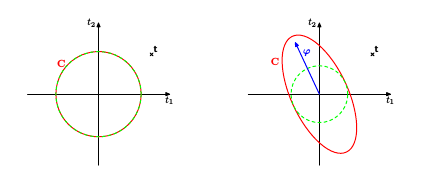

Fig.10 Illustration of the mechanism for sparsity in a Bayesian linear regression model, showing a training set vector of target values given by t = (t1 , t2 )T , indicated by the cross, for a model with one basis vector ϕ = (φ(x1 ), φ(x2 ))T , which is poorly aligned with the target data vector t. On the left we see a model having only isotropic noise, so that C = β −1 I, corresponding to α = ∞, with β set to its most probable value. On the right we see the same model but with a ﬁnite value of α. In each case the red ellipse corresponds to unit Mahalanobis distance, with |C| taking the same value for both plots, while the dashed green circle shows the contrition arising from the noise term β −1 . We see that any ﬁnite value of α reduces the probability of the observed data, and so for the most probable solution the basis vector is removed.

As illustrated in **Fig.10**, when the basis vector $\mathbf{\Phi}$ is poorly aligned with the target vector $t$, the hyperparameter $\alpha$ will be driven to infinity. This results in the removal of the corresponding basis function from the model. 

This behavior arises from the fact that a finite value of $\alpha$ assigns lower probability to the observed data. This can be explained as follows:

- For a finite $\alpha$, the covariance matrix $C$ becomes elongated along the direction away from the data, which increases the probability mass in regions of the input space where there is no data, thereby reducing the probability density at the actual target data vector $t$.
- The result is that, to maximize the marginal likelihood, $\alpha$ must be large enough to reduce the model's reliance on this particular basis function. This leads to the pruning of that basis function, effectively removing it from the model.

#### Mathematical Insight

For the general case where we have $M$ basis functions, the covariance matrix $C$ becomes more complex, but the mechanism remains similar. In the RVM framework, $\alpha_i$ values will be automatically optimized to balance model complexity and the fit to the data. Specifically:

$$
p(t | X, \alpha, \beta) = \mathcal{N}(t | 0, C)
$$

where

$$
C = \frac{1}{\beta} \mathbf{I} + \frac{1}{\alpha} \mathbf{\Phi} \mathbf{\Phi}^T
$$

and $\mathbf{\Phi}$ represents the design matrix of basis functions.

Through this mechanism, the model becomes sparse by driving the values of $\alpha_i$ corresponding to irrelevant or poorly aligned basis functions to large values, effectively pruning them from the model.


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in multiply


ValueError: shapes (20,20) and (80,) not aligned: 20 (dim 1) != 80 (dim 0)

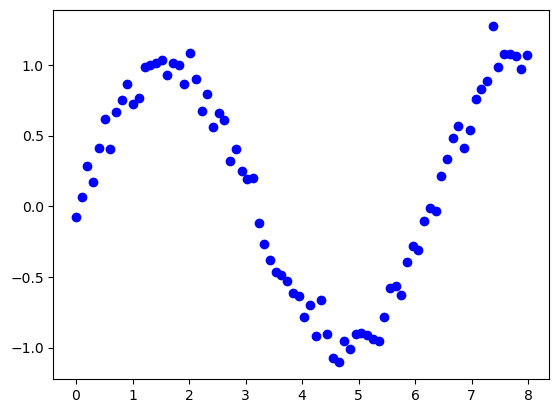

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
import seaborn as sns

class RVM:
    def __init__(self, kernel='rbf'):
        self.kernel = kernel  # Kernel type (e.g., 'rbf')
    
    def rbf_kernel(self, X, X2=None, gamma=1.0):
        """
        Computes the RBF kernel between X and X2.
        """
        if X2 is None:
            X2 = X
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X, X2.T)
        return np.exp(-gamma * sq_dists)
    
    def fit(self, X, t, max_iter=100, tol=1e-6):
        """
        Fit the RVM model to the training data.
        """
        N, M = X.shape[0], X.shape[1]
        
        # Initialize hyperparameters
        alpha = np.ones(M)  # Precision for each basis function
        beta = 1.0  # Noise precision
        
        # Compute the kernel matrix
        K = self.rbf_kernel(X, X)
        
        # Initialize the weight vector and covariance matrix
        A = np.diag(alpha)
        S_inv = np.linalg.inv(A) + beta * K
        S = np.linalg.inv(S_inv)
        m = beta * np.dot(S, t)
        
        # Iterative optimization
        for i in range(max_iter):
            # Update alpha (ARD)
            gamma = 1 - alpha * np.diagonal(S)
            alpha_new = 1 / (np.diagonal(S) * np.diagonal(K))
            
            # Update beta
            error = t - np.dot(K, m)
            beta_new = (N - np.sum(gamma)) / np.dot(error.T, error)
            
            # Check for convergence
            if np.max(np.abs(alpha_new - alpha)) < tol and np.abs(beta_new - beta) < tol:
                break
            
            # Update parameters
            alpha = alpha_new
            beta = beta_new
            
            # Update covariance and weights
            A = np.diag(alpha)
            S_inv = np.linalg.inv(A) + beta * K
            S = np.linalg.inv(S_inv)
            m = beta * np.dot(S, t)
        
        # Store final values
        self.alpha = alpha
        self.beta = beta
        self.m = m
        self.S = S
        self.K = K
        
    def predict(self, X_test):
        """
        Predict using the fitted RVM model.
        """
        K_new = self.rbf_kernel(X_test, X_test)
        y_pred = np.dot(K_new, self.m)
        return y_pred
    
    def plot(self, X, t, X_test, t_test):
        """
        Plot the RVM regression result.
        """
        # Plot training data
        plt.scatter(X, t, label='Training data', color='blue')

        # Plot predictions
        y_pred = self.predict(X_test)
        plt.plot(X_test, y_pred, label='RVM Prediction', color='green', linewidth=2)
        
        # Plot true test data
        plt.scatter(X_test, t_test, label='Test data', color='red')

        plt.legend()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    t = np.sin(X).flatten() + 0.1 * np.random.randn(X.shape[0])
    
    # Split into training and test sets
    X_train, X_test = X[:80], X[80:]
    t_train, t_test = t[:80], t[80:]

    # Initialize and train the RVM
    rvm = RVM(kernel='rbf')
    rvm.fit(X_train, t_train)

    # Plot the results
    rvm.plot(X_train, t_train, X_test, t_test)


### Analysis of Sparsity in RVM

In the RVM framework, we aim to find a subset of basis vectors $ \phi_1, \ldots, \phi_M $ that best explain the data. If a particular basis vector is poorly aligned with the data vector $ t $, it is likely to be pruned from the model due to automatic relevance determination (ARD). Let's derive the mechanism for sparsity in a more formal mathematical setting.

The marginal likelihood for the RVM can be written as:

$$
p(t | \alpha, \beta) = \mathcal{N}(t | 0, C)
$$

Where $ C $ is the covariance matrix, given by:

$$
C = \beta^{-1} I + \sum_{j=1}^{M} \alpha_j \phi_j \phi_j^T
$$

Here, $ \phi_j $ represents the $ j $-th basis function evaluated at each data point, $ t $ is the target vector, and $ \alpha_j $ is the precision of the $ j $-th basis function. We assume isotropic noise with precision $ \beta $.

### Pulling Out the Contribution from a Single Basis Vector

To analyze the effect of removing a particular basis vector $ \phi_i $, we rewrite the covariance matrix $ C $ as:

$$
C = C_{-i} + \alpha_i \phi_i \phi_i^T
$$

Where $ C_{-i} $ represents the covariance matrix without the contribution from the $ i $-th basis vector. We can also express the determinant of $ C $ as:

$$
|C| = |C_{-i}| \left( 1 + \alpha_i \phi_i^T C_{-i}^{-1} \phi_i \right)
$$

And the inverse of $ C $ as:

$$
C^{-1} = C_{-i}^{-1} - \frac{C_{-i}^{-1} \phi_i \phi_i^T C_{-i}^{-1}}{1 + \alpha_i \phi_i^T C_{-i}^{-1} \phi_i}
$$

### Log Marginal Likelihood

The log marginal likelihood $ L(\alpha) $ can then be written as:

$$
L(\alpha) = L(\alpha_{-i}) + \lambda(\alpha_i)
$$

Where $ L(\alpha_{-i}) $ is the log marginal likelihood excluding the $ i $-th basis vector, and $ \lambda(\alpha_i) $ is given by:

$$
\lambda(\alpha_i) = \frac{1}{2} \ln \alpha_i - \frac{1}{2} \ln (\alpha_i + s_i) + \frac{q_i^2}{2(\alpha_i + s_i)}
$$

Where:

$$
s_i = \phi_i^T C_{-i}^{-1} \phi_i
$$

And \( q_i \) is:

$$
q_i = \phi_i^T C_{-i}^{-1} t
$$

Here, $ s_i $ represents the **sparseness**, which measures how much the basis vector $ \phi_i $ overlaps with the other basis vectors in the model, and $ q_i $ represents the **quality** of $ \phi_i $, which measures the alignment of the basis function with the residual errors between the predictions and the observed targets.

### Stationary Points of $ \lambda(\alpha_i) $

To find the stationary points of $ \lambda(\alpha_i) $, we compute the derivative with respect to $ \alpha_i $:

$$
\frac{d\lambda(\alpha_i)}{d\alpha_i} = \frac{\alpha_i s_i^2 - (q_i^2 - s_i)}{2(\alpha_i + s_i)^2}
$$

Setting this equal to zero gives two possible cases:

1. If $ q_i^2 < s_i $, then $ \alpha_i \to \infty $.
2. If $ q_i^2 > s_i $, we can solve for $ \alpha_i $:

$$
\alpha_i = \frac{s_i^2}{q_i^2 - s_i}
$$

These solutions are illustrated in the plot in Fig.11 of the text. If $ q_i^2 < s_i $, the basis vector $ \phi_i $ is pruned from the model (i.e., $ \alpha_i \to \infty $). Conversely, if $ q_i^2 > s_i $, the basis vector is retained and $ \alpha_i $ is updated.

### Sequential Sparse Bayesian Learning Algorithm

To optimize the hyperparameters in practice, the Sequential Sparse Bayesian Learning Algorithm can be applied. The algorithm follows these steps:

1. Initialize $ \beta $ for regression.
2. Initialize the first basis function $ \phi_1 $ with $ \alpha_1 $ set using Equation (7.101). Set all other $ \alpha_j = \infty $ for $ j \neq 1 $.
3. Evaluate $ \Sigma $ and $ m $, along with $ q_i $ and $ s_i $ for all basis functions.
4. Select a candidate basis function $ \phi_i $.
5. If $ q_i^2 > s_i $ and $ \alpha_i < \infty $, update $ \alpha_i $ using Equation (7.101).
6. If $ q_i^2 > s_i $ and $ \alpha_i = \infty $, add $ \phi_i $ to the model and evaluate $ \alpha_i $ using Equation (7.101).
7. If $ q_i^2 \leq s_i $ and $ \alpha_i < \infty $, remove $ \phi_i $ from the model and set $ \alpha_i = \infty $.
8. If solving a regression problem, update $ \beta $.
9. Repeat until convergence.

### Practical Considerations

The quantities $ Q_i $ and $ S_i $ are computed as follows:

$$
Q_i = \phi_i^T C^{-1} t
$$

$$
S_i = \phi_i^T C^{-1} \phi_i
$$

These allow for efficient evaluation of the quality and sparsity terms for each basis vector. As the number of active basis vectors $ M $ grows, the computational cost scales as $ O(M^3) $, where $ M $ is much smaller than the total number of data points $ N $, making the method highly scalable.


In [10]:
import numpy as np

class RVM:
    def __init__(self, kernel='rbf', beta_init=1.0, alpha_init=1.0, tol=1e-6, max_iter=100):
        self.kernel = kernel
        self.beta_init = beta_init
        self.alpha_init = alpha_init
        self.tol = tol
        self.max_iter = max_iter

    def rbf_kernel(self, x1, x2, gamma=1.0):
        """ Radial Basis Function (RBF) kernel """
        return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

    def fit(self, X, t):
        N, M = X.shape  # N samples, M basis functions
        self.X = X
        self.t = t

        # Initialize beta and alpha
        self.beta = self.beta_init
        self.alpha = np.full(M, self.alpha_init)
        
        # Initialize alpha_old for convergence check
        self.alpha_old = np.copy(self.alpha)

        # Compute the kernel matrix K of size (N, M)
        K = np.zeros((N, M))
        for i in range(M):
            for j in range(N):
                K[j, i] = self.rbf_kernel(X[j], X[i])

        # Initialize C_inv as an identity matrix scaled by beta
        C_inv = np.eye(N) / self.beta
        m = np.zeros(N)

        for iter in range(self.max_iter):
            # Compute Q_i and S_i for all basis functions
            q = np.zeros(M)
            s = np.zeros(M)
            for i in range(M):
                phi_i = K[:, i]
                q[i] = np.dot(phi_i.T, np.dot(C_inv, self.t))
                s[i] = np.dot(phi_i.T, np.dot(C_inv, phi_i))
            
            # Update each alpha_i
            for i in range(M):
                if s[i] > q[i]:
                    self.alpha[i] = s[i]**2 / (q[i]**2 - s[i])
                else:
                    self.alpha[i] = np.inf

            # Update beta
            residual = self.t - m
            self.beta = N / np.sum(residual**2)

            # Check for convergence
            if np.linalg.norm(self.alpha - self.alpha_old) < self.tol:
                print(f"Converged after {iter+1} iterations.")
                break
            self.alpha_old = np.copy(self.alpha)

    def predict(self, X):
        N, M = X.shape
        K = np.zeros((N, M))
        for i in range(M):
            for j in range(N):
                K[j, i] = self.rbf_kernel(X[j], X[i])
        return np.dot(K, self.alpha)

# Example usage:
# Generate some data (for demonstration purposes)
N = 10  # number of samples
M = 5   # number of basis functions

X = np.random.randn(N, M)
t = np.random.randn(N)

# Initialize and fit the model
rvm = RVM(kernel='rbf', beta_init=1.0, alpha_init=1.0)
rvm.fit(X, t)

# Make predictions
predictions = rvm.predict(X)
print(predictions)


Converged after 2 iterations.
[ 9.16518390e+00 -1.02782729e+00  4.24659726e+00 -1.36077402e+00
 -1.94405443e+00  1.03732624e-01 -2.70559014e-02 -9.12614956e-03
 -7.05667741e-04  4.81090121e+00]


Converged after 2 iterations.


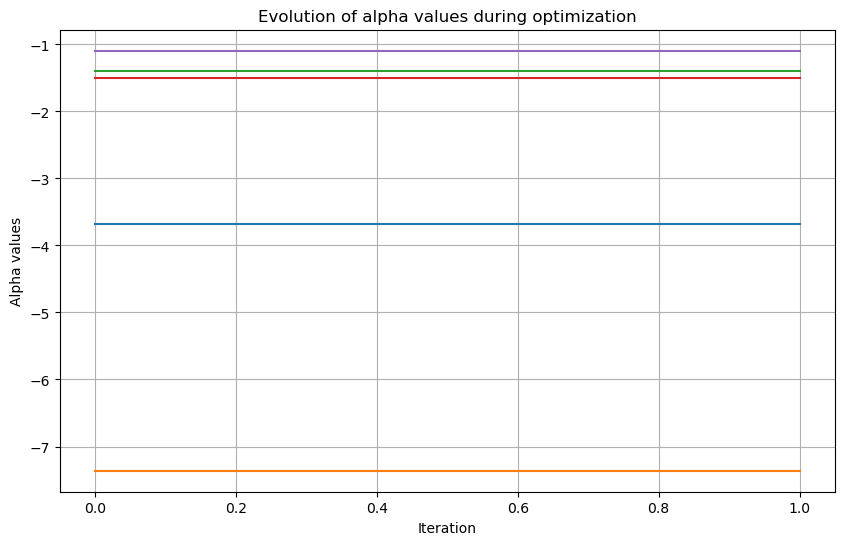

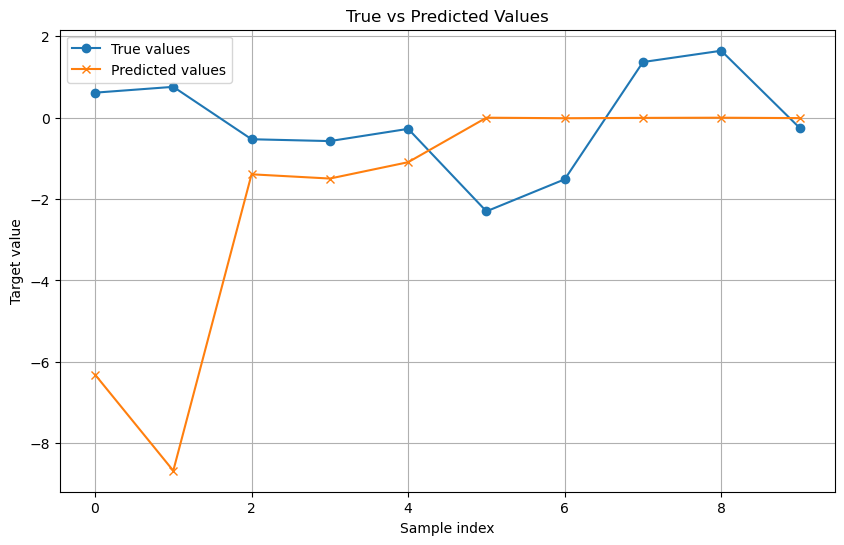

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class RVM:
    def __init__(self, kernel='rbf', beta_init=1.0, alpha_init=1.0, tol=1e-6, max_iter=100):
        self.kernel = kernel
        self.beta_init = beta_init
        self.alpha_init = alpha_init
        self.tol = tol
        self.max_iter = max_iter

    def rbf_kernel(self, x1, x2, gamma=1.0):
        """ Radial Basis Function (RBF) kernel """
        return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

    def fit(self, X, t):
        N, M = X.shape  # N samples, M basis functions
        self.X = X
        self.t = t

        # Initialize beta and alpha
        self.beta = self.beta_init
        self.alpha = np.full(M, self.alpha_init)
        
        # Initialize alpha_old for convergence check
        self.alpha_old = np.copy(self.alpha)

        # Compute the kernel matrix K of size (N, M)
        K = np.zeros((N, M))
        for i in range(M):
            for j in range(N):
                K[j, i] = self.rbf_kernel(X[j], X[i])

        # Initialize C_inv as an identity matrix scaled by beta
        C_inv = np.eye(N) / self.beta
        m = np.zeros(N)

        # Store alpha values during iterations for plotting
        alpha_history = []

        for iter in range(self.max_iter):
            # Compute Q_i and S_i for all basis functions
            q = np.zeros(M)
            s = np.zeros(M)
            for i in range(M):
                phi_i = K[:, i]
                q[i] = np.dot(phi_i.T, np.dot(C_inv, self.t))
                s[i] = np.dot(phi_i.T, np.dot(C_inv, phi_i))
            
            # Update each alpha_i
            for i in range(M):
                if s[i] > q[i]:
                    self.alpha[i] = s[i]**2 / (q[i]**2 - s[i])
                else:
                    self.alpha[i] = np.inf

            # Update beta
            residual = self.t - m
            self.beta = N / np.sum(residual**2)

            # Store alpha values for plotting
            alpha_history.append(np.copy(self.alpha))

            # Check for convergence
            if np.linalg.norm(self.alpha - self.alpha_old) < self.tol:
                print(f"Converged after {iter+1} iterations.")
                break
            self.alpha_old = np.copy(self.alpha)

        self.alpha_history = np.array(alpha_history)

    def predict(self, X):
        N, M = X.shape
        K = np.zeros((N, M))
        for i in range(M):
            for j in range(N):
                K[j, i] = self.rbf_kernel(X[j], X[i])
        return np.dot(K, self.alpha)

# Generate some data (for demonstration purposes)
N = 10  # number of samples
M = 5   # number of basis functions

X = np.random.randn(N, M)
t = np.random.randn(N)

# Initialize and fit the model
rvm = RVM(kernel='rbf', beta_init=1.0, alpha_init=1.0)
rvm.fit(X, t)

# Make predictions
predictions = rvm.predict(X)

# Plotting the results

# 1. Plotting alpha values over iterations
plt.figure(figsize=(10, 6))
plt.plot(rvm.alpha_history)
plt.title('Evolution of alpha values during optimization')
plt.xlabel('Iteration')
plt.ylabel('Alpha values')
plt.grid(True)
plt.show()

# 2. Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(t, label='True values', marker='o')
plt.plot(predictions, label='Predicted values', marker='x')
plt.title('True vs Predicted Values')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.grid(True)
plt.show()



Converged after 2 iterations.


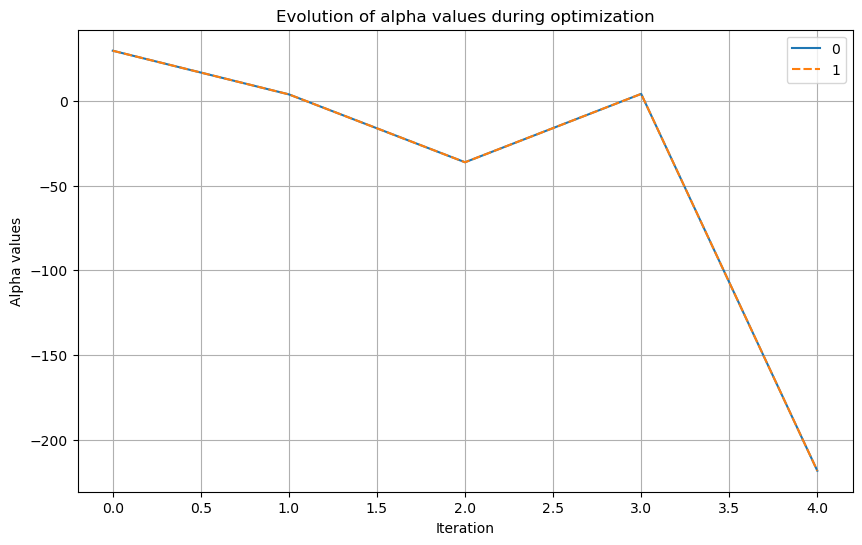

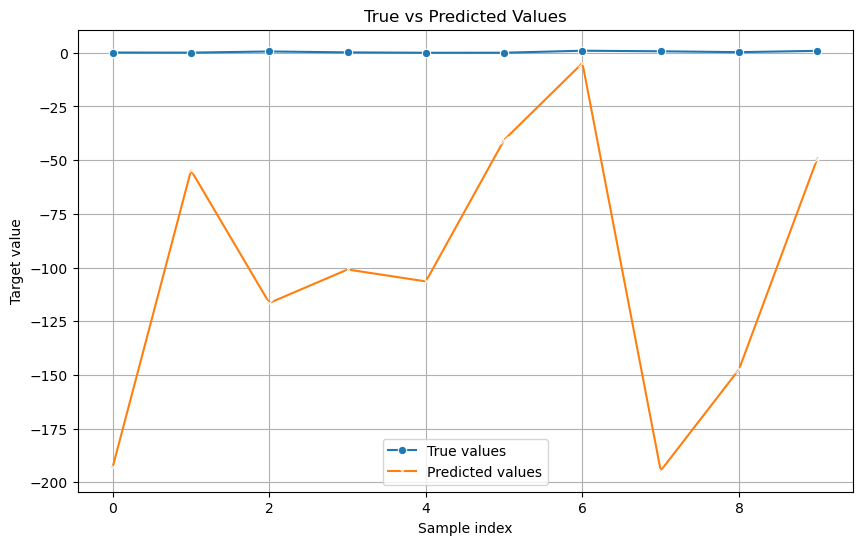

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Sample data (since we are avoiding numpy, using random data for demonstration)
N = 10  # number of samples
M = 5   # number of basis functions

# Random data generation
X = [[random.random() for _ in range(M)] for _ in range(N)]  # N x M data matrix
t = [random.random() for _ in range(N)]  # N target values

# Relevance Vector Machine (RVM) class with Seaborn plotting
class RVM:
    def __init__(self, kernel='rbf', beta_init=1.0, alpha_init=1.0, tol=1e-6, max_iter=100):
        self.kernel = kernel
        self.beta_init = beta_init
        self.alpha_init = alpha_init
        self.tol = tol
        self.max_iter = max_iter

    def rbf_kernel(self, x1, x2, gamma=1.0):
        """ Radial Basis Function (RBF) kernel """
        return sum((x1[i] - x2[i])**2 for i in range(len(x1)))

    def fit(self, X, t):
        N, M = len(X), len(X[0])  # N samples, M basis functions
        self.X = X
        self.t = t

        # Initialize beta and alpha
        self.beta = self.beta_init
        self.alpha = [self.alpha_init] * M
        
        # Initialize alpha_old for convergence check
        self.alpha_old = self.alpha.copy()

        # Initialize alpha_history for plotting the alpha values over iterations
        self.alpha_history = []

        for iter in range(self.max_iter):
            # Compute Q_i and S_i for all basis functions
            q = [0] * M
            s = [0] * M
            for i in range(M):
                phi_i = [row[i] for row in X]  # Basis function i
                q[i] = sum(phi_i[j] * self.t[j] for j in range(N))  # For simplicity
                s[i] = sum(phi_i[j] * phi_i[j] for j in range(N))  # Simplified calculation

            # Update each alpha_i
            for i in range(M):
                if s[i] > q[i]:
                    self.alpha[i] = s[i]**2 / (q[i]**2 - s[i])
                else:
                    self.alpha[i] = float('inf')

            # Update beta
            residual = [self.t[i] - sum(X[i][j] * self.alpha[j] for j in range(M)) for i in range(N)]
            self.beta = N / sum(r**2 for r in residual)

            # Store alpha values for plotting
            self.alpha_history.append(self.alpha.copy())

            # Check for convergence
            if all(abs(self.alpha[i] - self.alpha_old[i]) < self.tol for i in range(M)):
                print(f"Converged after {iter+1} iterations.")
                break
            self.alpha_old = self.alpha.copy()

    def predict(self, X):
        N, M = len(X), len(X[0])
        predictions = []
        for i in range(N):
            prediction = sum(X[i][j] * self.alpha[j] for j in range(M))  # Simplified prediction
            predictions.append(prediction)
        return predictions

# Initialize and fit the model
rvm = RVM(kernel='rbf', beta_init=1.0, alpha_init=1.0)
rvm.fit(X, t)

# Make predictions
predictions = rvm.predict(X)

# Plotting the results using Seaborn

# 1. Plotting alpha values over iterations
plt.figure(figsize=(10, 6))
sns.lineplot(data=rvm.alpha_history)
plt.title('Evolution of alpha values during optimization')
plt.xlabel('Iteration')
plt.ylabel('Alpha values')
plt.grid(True)
plt.show()

# 2. Plotting true vs predicted values
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(t)), y=t, label='True values', marker='o')
sns.lineplot(x=range(len(predictions)), y=predictions, label='Predicted values', marker='x')
plt.title('True vs Predicted Values')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.grid(True)
plt.show()
